In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# ECOMON Plankton Data Preliminary Analysis

Exploratory data analysis on ECOMON plankton data needed to determine the suitability of this dataset for creation of a GAM on various environmental parameters to predict spawning suitability at a location.

In [4]:
ecomon_data = pd.read_csv("../auxdata/EcoMon_Plankton_Data_v3_5.csv")
ecomon_data.head()

/Users/joshua/miniconda3/envs/larval-dispersal-modeling/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


cruise_name  station zoo_gear ich_gear      lat      lon       date  time  \
0      AA8704       42      6B3      6B5  38.7500 -73.7500  17-Apr-87  0:45   
1      AA8704       43      6B3      6B5  38.9500 -74.1167  17-Apr-87  2:50   
2      AA8704       44      6B3      6B5  38.9167 -74.5500  17-Apr-87  4:35   
3      AA8704       45      6B3      6B5  39.1000 -74.3167  17-Apr-87  6:05   
4      AA8704       46      6B3      6B5  39.2333 -74.4333  17-Apr-87  7:00   

   depth  sfc_temp  ...  botspp_100m3  hipobl_100m3  parden_100m3  \
0     54       NaN  ...           0.0           0.0           0.0   
1     46       NaN  ...           0.0           0.0           0.0   
2     28       NaN  ...           0.0           0.0           0.0   
3     24       NaN  ...           0.0           0.0           0.0   
4     18       NaN  ...           0.0           0.0           0.0   

   pseame_100m3  hippla_100m3  limfer_100m3  glycyn_100m3  scoaqu_100m3  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   sypspp_100m3  lopame_100m3  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0  

[5 rows x 289 columns]

In [5]:
ecomon_species_headings = {
    "Atlantic Cod": "gadmor_100m3",
    "Haddock": "melaeg_100m3",
    "Yellowtail Flounder": "limfer_100m3",
    "Atlantic Mackerel": "scosco_100m3",
    "Atlantic Herring": "cluhar_100m3",
    "American Butterfish": "pepspp_100m3"
}

In [6]:
ecomon_data.columns[:15]

data_columns = ['lat', 'lon', 'date', 'depth', 'sfc_temp', 'sfc_salt', 'btm_temp', 'btm_salt']
columns = data_columns + list(ecomon_species_headings.values())

columns

['lat',
 'lon',
 'date',
 'depth',
 'sfc_temp',
 'sfc_salt',
 'btm_temp',
 'btm_salt',
 'gadmor_100m3',
 'melaeg_100m3',
 'limfer_100m3',
 'scosco_100m3',
 'cluhar_100m3',
 'pepspp_100m3']

In [7]:
ecomon_data_filtered = ecomon_data[columns]
ecomon_data_filtered.head()

lat      lon       date  depth  sfc_temp  sfc_salt  btm_temp  btm_salt  \
0  38.7500 -73.7500  17-Apr-87     54       NaN       NaN       NaN       NaN   
1  38.9500 -74.1167  17-Apr-87     46       NaN       NaN       NaN       NaN   
2  38.9167 -74.5500  17-Apr-87     28       NaN       NaN       NaN       NaN   
3  39.1000 -74.3167  17-Apr-87     24       NaN       NaN       NaN       NaN   
4  39.2333 -74.4333  17-Apr-87     18       NaN       NaN       NaN       NaN   

   gadmor_100m3  melaeg_100m3  limfer_100m3  scosco_100m3  cluhar_100m3  \
0           1.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   pepspp_100m3  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [8]:
ecomon_data_filtered['date'] = pd.to_datetime(ecomon_data_filtered['date'])

<ipython-input-8-e9be61120444>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecomon_data_filtered['date'] = pd.to_datetime(ecomon_data_filtered['date'])


In [9]:
ecomon_data_clean = ecomon_data_filtered.dropna()
ecomon_data_clean = ecomon_data_clean[ecomon_data_clean['depth'] != 9999]
ecomon_data_clean.head()

lat      lon       date  depth  sfc_temp  sfc_salt  btm_temp  \
89  42.3383 -65.5733 1999-06-08    102     12.07    31.126     11.60   
91  42.9933 -66.1217 1999-06-08     96      9.39    32.146      6.50   
92  42.7367 -66.3733 1999-06-08     97     10.90    31.950      6.83   
93  43.0283 -66.9450 1999-06-08    166     11.62    32.124      7.97   
94  43.2933 -66.5417 1999-06-08     62      7.39    31.854      6.49   

    btm_salt  gadmor_100m3  melaeg_100m3  limfer_100m3  scosco_100m3  \
89    34.951           0.0           0.0           0.0           0.0   
91    32.879           0.0           2.0           0.0           0.0   
92    33.148           0.0           1.0           0.0           0.0   
93    34.133           0.0           0.0           0.0           0.0   
94    32.416           0.0           0.0           0.0           0.0   

    cluhar_100m3  pepspp_100m3  
89           0.0           0.0  
91           0.0           0.0  
92           0.0           0.0  
93           0.0           0.0  
94           0.0           0.0

In [10]:
ecomon_data_clean.describe()

lat           lon         depth      sfc_temp      sfc_salt  \
count  19305.000000  19305.000000  19305.000000  19305.000000  19305.000000   
mean      40.660912    -70.195742     76.979902     11.421906     32.532785   
std        1.749350      2.863971     53.562319      5.822253      0.958127   
min       35.166700    -75.946700      9.000000     -0.530000     19.294000   
25%       40.056700    -72.766700     40.000000      6.420000     32.135000   
50%       40.916700    -69.566700     63.000000     10.550000     32.540000   
75%       41.750000    -67.750000     93.000000     15.280000     32.959000   
max       44.770000    -65.248300   2000.000000     28.340000     36.407000   

           btm_temp      btm_salt  gadmor_100m3  melaeg_100m3  limfer_100m3  \
count  19305.000000  19305.000000  19305.000000  19305.000000  19305.000000   
mean       9.219238     33.207386      0.663921      1.058897      1.537529   
std        3.955678      0.985761      5.047493     11.944776     17.206898   
min        0.170000     23.520000      0.000000      0.000000      0.000000   
25%        6.130000     32.541000      0.000000      0.000000      0.000000   
50%        8.430000     32.977000      0.000000      0.000000      0.000000   
75%       11.800000     33.724000      0.000000      0.000000      0.000000   
max       28.030000     36.972000    218.000000    565.000000   1055.000000   

       scosco_100m3  cluhar_100m3  pepspp_100m3  
count  19305.000000  19305.000000  19305.000000  
mean       1.374981     17.860813      0.587672  
std       24.948221    375.034987      6.069599  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000  
max     1259.000000  33109.000000    442.000000

In [11]:
def filter_by_species(df, species):
    col = ecomon_species_headings[species]
    all_columns = data_columns + [col]
    processed_df = df[df[col] > 0][all_columns]
    processed_df.columns = data_columns + ["catch"]
    return processed_df

In [12]:
def plot_catch(species, ax=None):
    df = filter_by_species(ecomon_data_clean, species)
    lats, lons, catch = df['lat'], df['lon'], df['catch']
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    scatter = ax.scatter(lons, lats, c=catch, s=catch/50)
    ax.set_title("{} Catch".format(species))
    
    return ax, scatter

def plot_temp(species, ax=None):
    df = filter_by_species(ecomon_data_clean, species)
    lats, lons, temp, catch = df['lat'], df['lon'], df['sfc_temp'], df['catch']
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    scatter = ax.scatter(lons, lats, c=temp, s=catch/50)
    ax.set_title("{} Temperature".format(species))
    
    return ax, scatter

def plot_sal(species, ax=None):
    df = filter_by_species(ecomon_data_clean, species)
    lats, lons, sal, catch = df['lat'], df['lon'], df['sfc_salt'], df['catch']
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    scatter = ax.scatter(lons, lats, c=sal, s=catch/50)
    ax.set_title("{} Salinity".format(species))
    
    return ax, scatter

def plot_depth(species, ax=None):
    df = filter_by_species(ecomon_data_clean, species)
    lats, lons, depth, catch = df['lat'], df['lon'], df['depth'], df['catch']
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    scatter = ax.scatter(lons, lats, c=depth, s=catch/50)
    ax.set_title("{} Depth".format(species))
    
    return ax, scatter

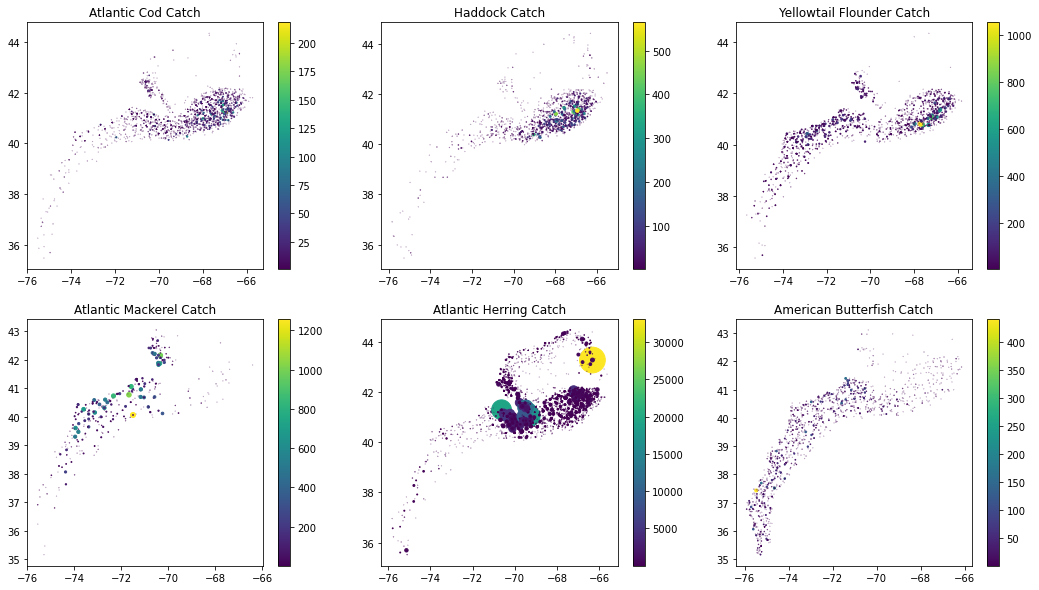

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

axes = ax.ravel()

for s, a in zip(ecomon_species_headings.keys(), axes):
    _, scatter = plot_catch(s, a)
    plt.colorbar(scatter, ax=a)

This all looks generally good relative to what NOAA reports in the Habitat source sdocuments. The sparsity of the data for species like mackerel and butterfish is concerning, as is the overabundance of herring catch data. May make parameterizing a GAM more complicated.

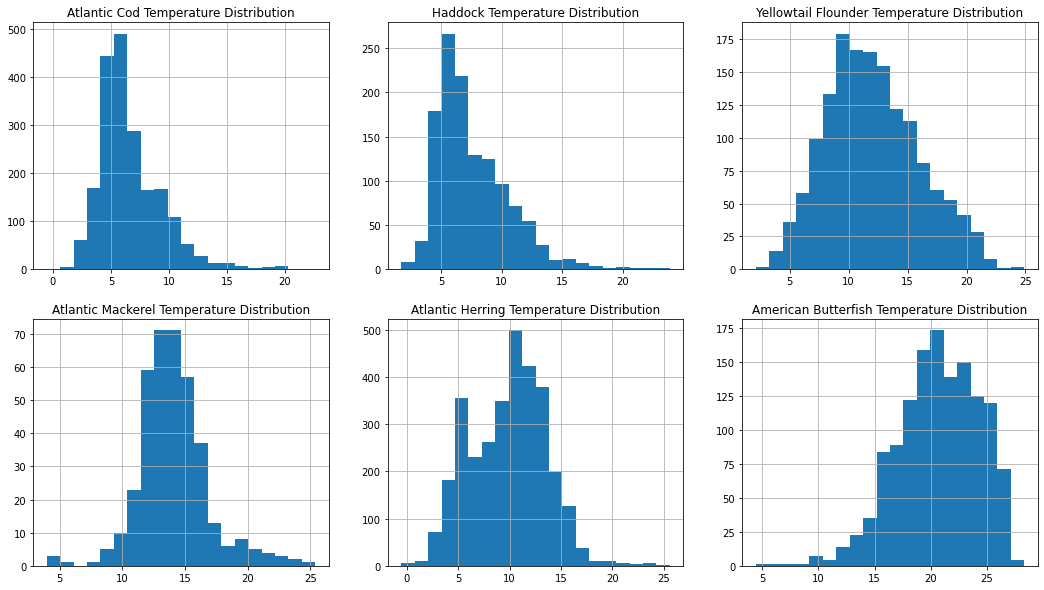

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

axes = ax.ravel()

for s, a in zip(ecomon_species_headings.keys(), axes):
    df = filter_by_species(ecomon_data_clean, s)
    df['sfc_temp'].hist(bins=20, ax=a)
    a.set_title("{} Temperature Distribution".format(s))

Temperature distributions look generally correct with Cod and Haddock being the coldest, Butterfish the warmest, and the other three species more intermediate.

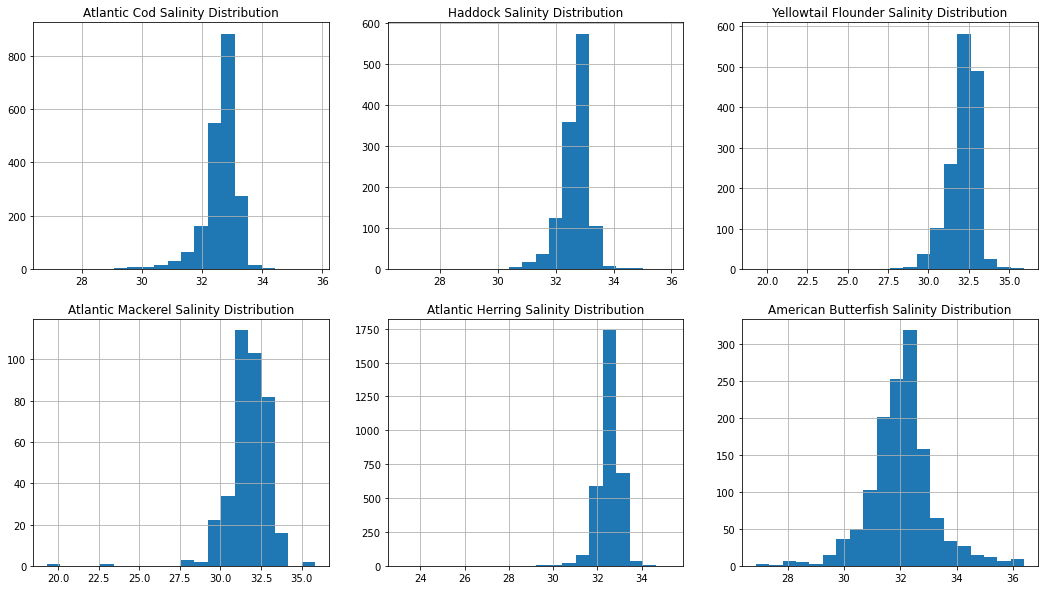

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

axes = ax.ravel()

for s, a in zip(ecomon_species_headings.keys(), axes):
    df = filter_by_species(ecomon_data_clean, s)
    df['sfc_salt'].hist(bins=20, ax=a)
    a.set_title("{} Salinity Distribution".format(s))

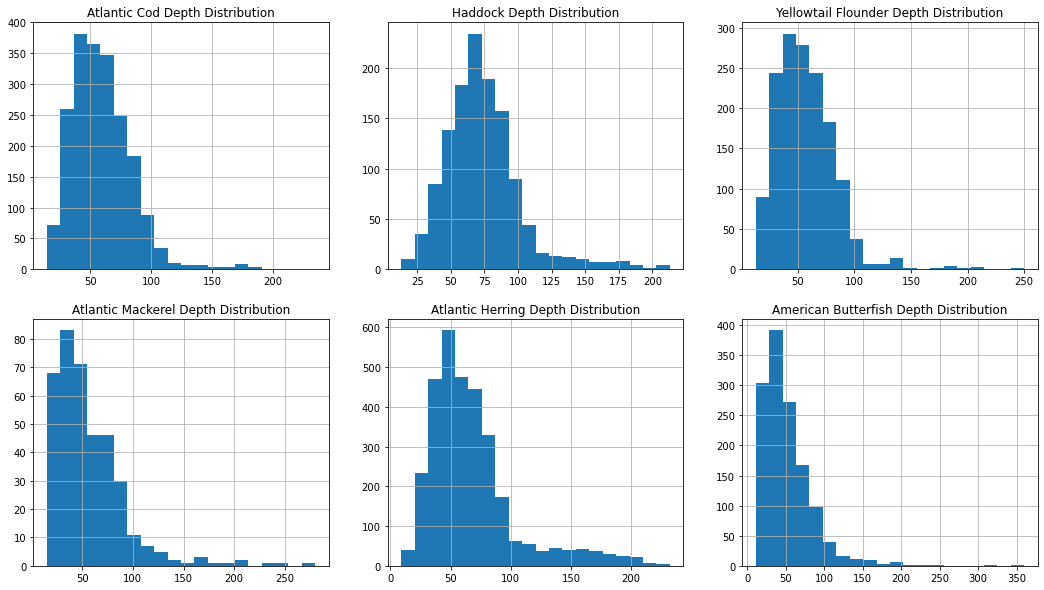

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

axes = ax.ravel()

for s, a in zip(ecomon_species_headings.keys(), axes):
    df = filter_by_species(ecomon_data_clean, s)
    df['depth'].hist(bins=20, ax=a)
    a.set_title("{} Depth Distribution".format(s))

Seem generally correct relative to published data.

# NOAA Trawl Survey Data Preliminary Analysis

In [17]:
noaa_trawl_catch_data = pd.read_csv("../auxdata/noaa-trawl-data/22561_UNION_FSCS_SVCAT.csv") 
noaa_trawl_station_data = pd.read_csv("../auxdata/noaa-trawl-data/22561_UNION_FSCS_SVSTA.csv") 

/Users/joshua/miniconda3/envs/larval-dispersal-modeling/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
noaa_trawl_catch_data['ID'] = noaa_trawl_catch_data.apply (lambda row: str(row['CRUISE6'])+"0"+str(row['STRATUM'])+str(row["TOW"]).zfill(3)+str(row["STATION"]).zfill(4), axis=1)
noaa_trawl_catch_data['ID'] = noaa_trawl_catch_data['ID'].astype("int64")

In [61]:
station_data_columns = ['ID', 'AVGDEPTH', 'DECDEG_BEGLAT', 'DECDEG_BEGLON', 'DECDEG_ENDLAT', 'DECDEG_ENDLON', 'SURFTEMP', 'SURFSALIN', 'BOTTEMP', 'BOTSALIN', 'BKTTEMP']
catch_data_columns = ['ID', 'LOGGED_SPECIES_NAME', 'EXPCATCHNUM']

In [62]:
noaa_trawl_station_data_filtered = noaa_trawl_station_data[station_data_columns]

noaa_trawl_catch_data_filtered = noaa_trawl_catch_data[catch_data_columns]

In [63]:
noaa_trawl_catch_data_filtered = noaa_trawl_catch_data_filtered.set_index(["ID"])
noaa_trawl_station_data_filtered = noaa_trawl_station_data_filtered.set_index(["ID"])

In [64]:
noaa_trawl_data = noaa_trawl_catch_data_filtered.join(noaa_trawl_station_data_filtered)

In [65]:
noaa_trawl_data.drop(['DECDEG_ENDLAT', 'DECDEG_ENDLON'], axis=1, inplace=True)

In [66]:
noaa_trawl_data

LOGGED_SPECIES_NAME  EXPCATCHNUM  \
ID                                                                              
196803010100010014                                 SPINY DOGFISH          1.0   
196803010100010014                                  LITTLE SKATE          6.0   
196803010100010014                              ATLANTIC HERRING        272.0   
196803010100010014                                       ALEWIFE          2.0   
196803010100010014                                   SILVER HAKE         59.0   
...                                                          ...          ...   
201902085300020031                                     Congridae          1.0   
201902085300020031  Illex illecebrosus (northern shortfin squid)         52.0   
201902085300020031                Loligo pealeii (longfin squid)         21.0   
201902085300020031             Ariomma melanum (brown driftfish)          1.0   
201902085300020031                                         Trash          0.0   

                    AVGDEPTH  DECDEG_BEGLAT  DECDEG_BEGLON  SURFTEMP  \
ID                                                                     
196803010100010014      40.0      39.783333     -73.333333       3.3   
196803010100010014      40.0      39.783333     -73.333333       3.3   
196803010100010014      40.0      39.783333     -73.333333       3.3   
196803010100010014      40.0      39.783333     -73.333333       3.3   
196803010100010014      40.0      39.783333     -73.333333       3.3   
...                      ...            ...            ...       ...   
201902085300020031     298.0      34.856645     -75.381743       NaN   
201902085300020031     298.0      34.856645     -75.381743       NaN   
201902085300020031     298.0      34.856645     -75.381743       NaN   
201902085300020031     298.0      34.856645     -75.381743       NaN   
201902085300020031     298.0      34.856645     -75.381743       NaN   

                    SURFSALIN  BOTTEMP  BOTSALIN  BKTTEMP  
ID                                                         
196803010100010014        NaN      4.2       NaN      3.3  
196803010100010014        NaN      4.2       NaN      3.3  
196803010100010014        NaN      4.2       NaN      3.3  
196803010100010014        NaN      4.2       NaN      3.3  
196803010100010014        NaN      4.2       NaN      3.3  
...                       ...      ...       ...      ...  
201902085300020031        NaN      NaN       NaN      NaN  
201902085300020031        NaN      NaN       NaN      NaN  
201902085300020031        NaN      NaN       NaN      NaN  
201902085300020031        NaN      NaN       NaN      NaN  
201902085300020031        NaN      NaN       NaN      NaN  

[247186 rows x 10 columns]

In [25]:
noaa_species_headings = {
    "Atlantic Cod": "ATLANTIC COD",
    "Haddock": "HADDOCK",
    "Yellowtail Flounder": "YELLOWTAIL FLOUNDER",
    "Atlantic Mackerel": "ATLANTIC MACKEREL",
    "Atlantic Herring": "ATLANTIC HERRING",
    "American Butterfish": "BUTTERFISH"
}

In [26]:
def filter_by_species(df, species):
    s = noaa_species_headings[species]
    processed_df = df[df['LOGGED_SPECIES_NAME'] == s]
    return processed_df

In [27]:
def plot_catch(species, ax=None):
    df = filter_by_species(noaa_trawl_data, species)
    lats, lons, catch = df['DECDEG_BEGLAT'], df['DECDEG_BEGLON'], df['EXPCATCHNUM']
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    scatter = ax.scatter(lons, lats, c=catch, s=catch/50)
    ax.set_title("{} Catch".format(species))
    
    return ax, scatter

def plot_temp(species, ax=None):
    df = filter_by_species(noaa_trawl_data, species)
    lats, lons, temp, catch = df['DECDEG_BEGLAT'], df['DECDEG_BEGLON'], df['SURFTEMP'], df['EXPCATCHNUM']
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    scatter = ax.scatter(lons, lats, c=temp, s=catch/50)
    ax.set_title("{} Temperature".format(species))
    
    return ax, scatter

def plot_sal(species, ax=None):
    df = filter_by_species(noaa_trawl_data, species)
    lats, lons, sal, catch = df['DECDEG_BEGLAT'], df['DECDEG_BEGLON'], df['SURFSALIN'], df['EXPCATCHNUM']
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    scatter = ax.scatter(lons, lats, c=sal, s=catch/50)
    ax.set_title("{} Salinity".format(species))
    
    return ax, scatter

def plot_depth(species, ax=None):
    df = filter_by_species(noaa_trawl_data, species)
    lats, lons, depth, catch = df['DECDEG_BEGLAT'], df['DECDEG_BEGLON'], df['AVGDEPTH'], df['EXPCATCHNUM']
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    scatter = ax.scatter(lons, lats, c=depth, s=catch/50)
    ax.set_title("{} Depth".format(species))
    
    return ax, scatter

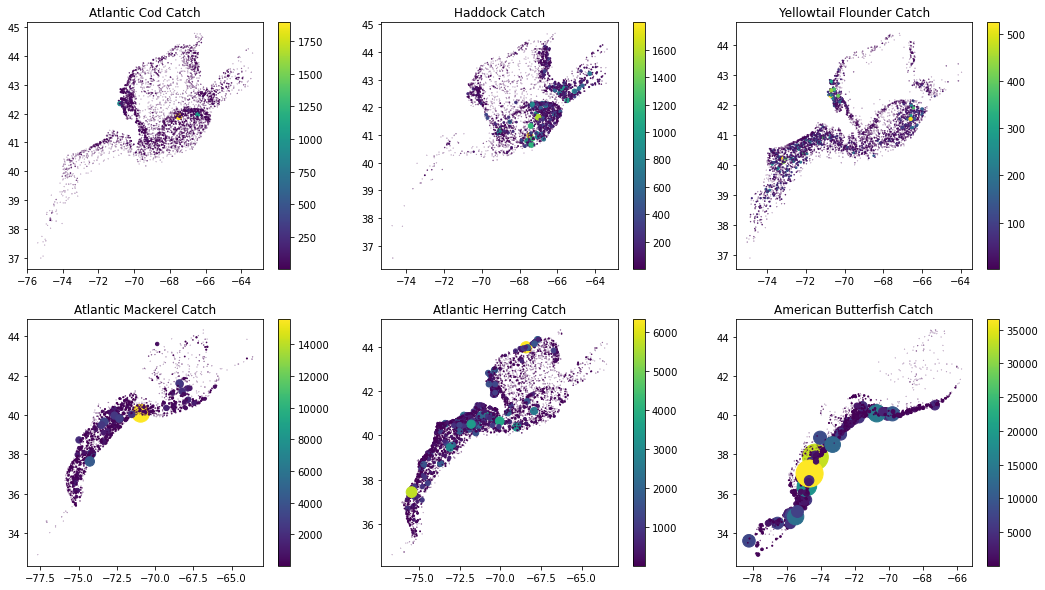

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

axes = ax.ravel()

for s, a in zip(ecomon_species_headings.keys(), axes):
    _, scatter = plot_catch(s, a)
    plt.colorbar(scatter, ax=a)

These look good relative to the NOAA published data.

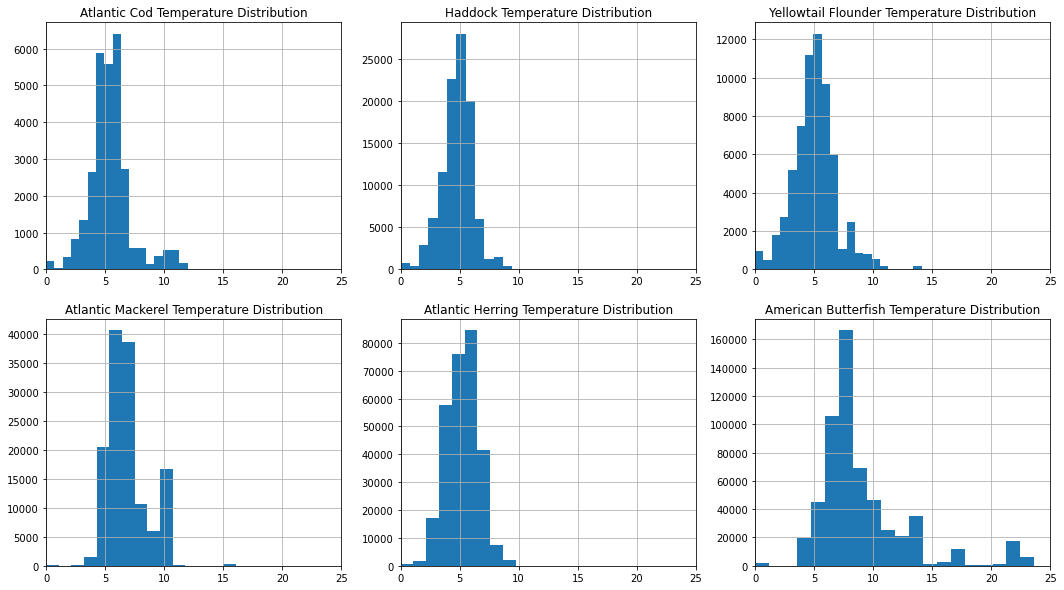

In [72]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

axes = ax.ravel()

for s, a in zip(ecomon_species_headings.keys(), axes):
    #df = filter_by_species(noaa_trawl_data, s)
    #df['SURFTEMP'].hist(bins=20, ax=a)
    temps = weighted_histogram(s, "SURFTEMP")
    temps.hist(bins=20, ax=a)
    a.set_title("{} Temperature Distribution".format(s))
    a.set_xlim((0, 25))

These plots look suspect to me, as they are showing similar mean temperatures for all species, which we know not to be the case. Need to look at this a bit closer imo. 

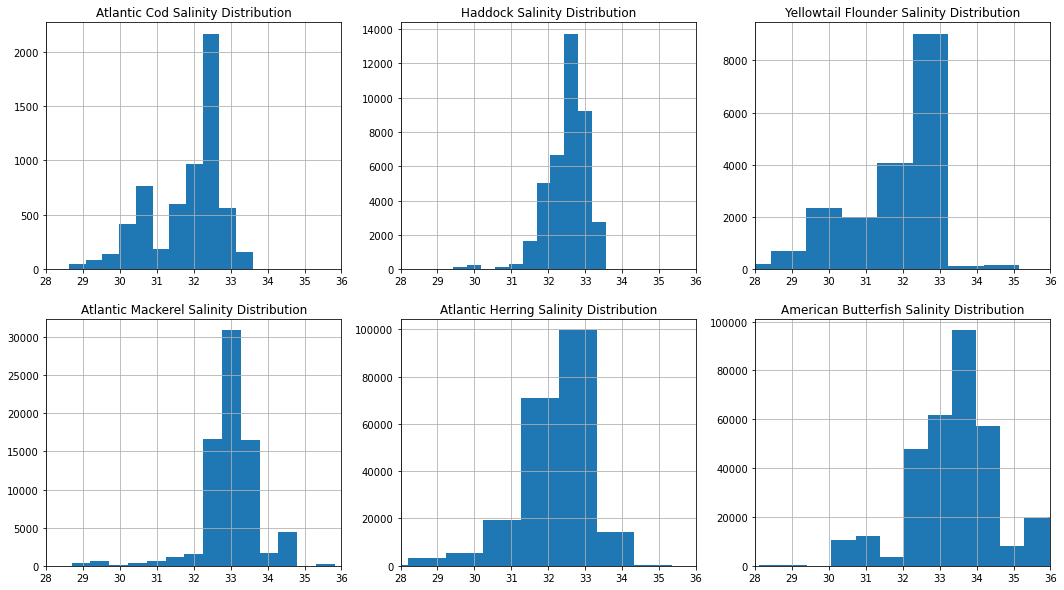

In [34]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

axes = ax.ravel()

for s, a in zip(ecomon_species_headings.keys(), axes):
    sal = weighted_histogram(s, "SURFSALIN")
    sal.hist(bins=20, ax=a)
    a.set_title("{} Salinity Distribution".format(s))
    a.set_xlim(28, 36)

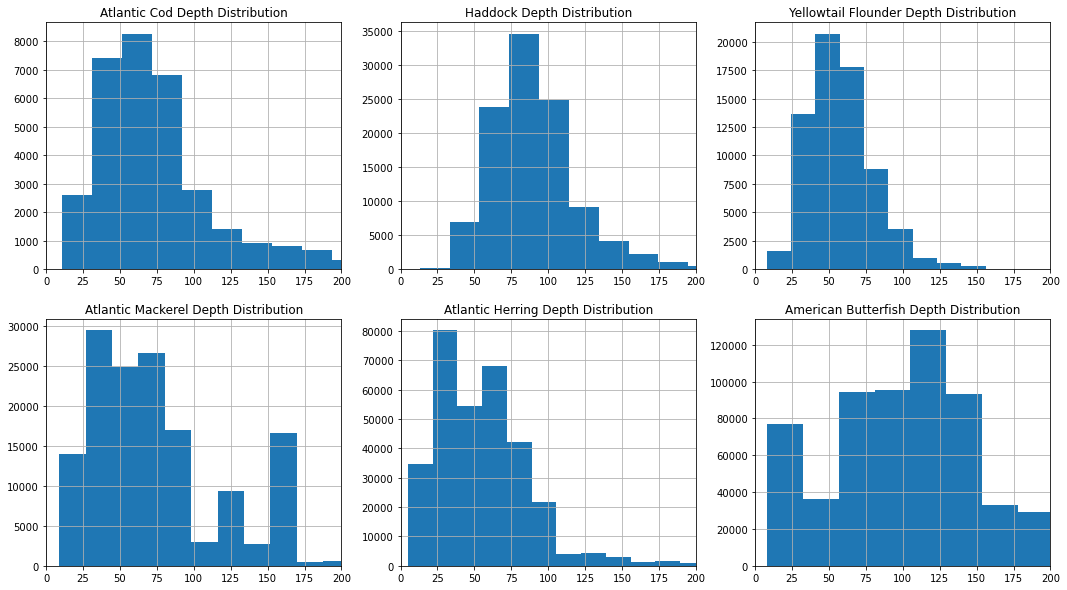

In [35]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

axes = ax.ravel()

for s, a in zip(ecomon_species_headings.keys(), axes):
    depths = weighted_histogram(s, "AVGDEPTH")
    depths.hist(bins=20, ax=a)
    a.set_title("{} Depth Distribution".format(s))
    a.set_xlim((0, 200))

These seem legitimate relative to published data.

In [38]:
def weighted_histogram(species, parameter):
    df = filter_by_species(noaa_trawl_data, species)
    catch = df["EXPCATCHNUM"].fillna(0)
    param = df[parameter]
    
    vals = np.repeat(param, catch)
    return pd.Series(vals)

In [39]:
cod = weighted_histogram('Atlantic Cod', 'SURFTEMP')
cod.describe()

count    28910.000000
mean         5.439246
std          1.776497
min          0.000000
25%          4.500000
50%          5.300000
75%          6.040000
max         14.100000
Name: SURFTEMP, dtype: float64

In [40]:
had = weighted_histogram('Haddock', 'SURFTEMP')
had.describe()

count    101318.000000
mean          4.823406
std           1.299358
min           0.000000
25%           4.100000
50%           4.900000
75%           5.600000
max          15.750000
Name: SURFTEMP, dtype: float64

In [69]:
noaa_trawl_data_good_species = noaa_trawl_data[noaa_trawl_data['LOGGED_SPECIES_NAME'].isin(noaa_species_headings.values())]

<AxesSubplot:title={'center':'SURFTEMP'}, xlabel='LOGGED_SPECIES_NAME'>

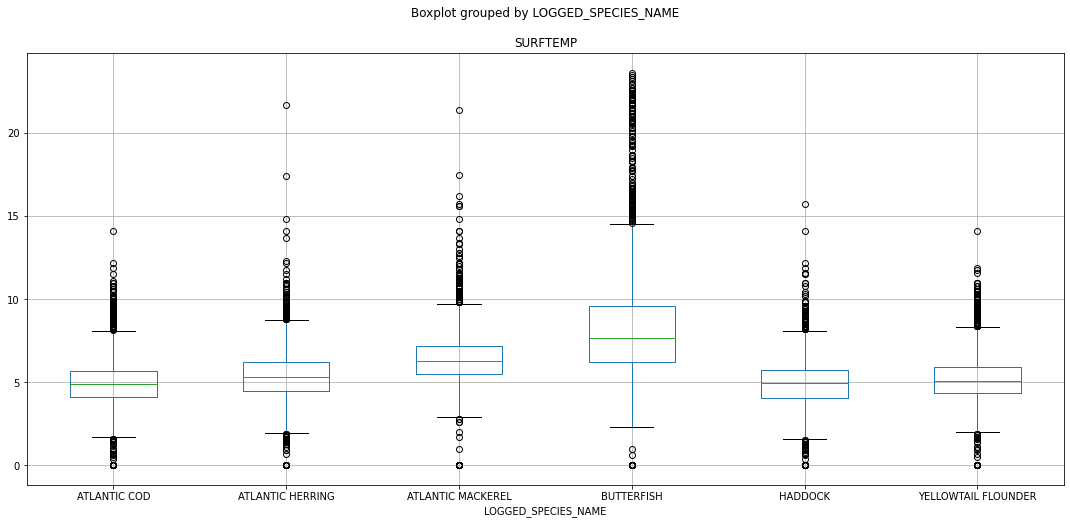

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
noaa_trawl_data_good_species.boxplot('SURFTEMP', by="LOGGED_SPECIES_NAME", ax=ax)

In [52]:
cod = filter_by_species(noaa_trawl_data_good_species, 'Atlantic Cod')
cod['SURFTEMP'].describe()

count    3459.000000
mean        4.927765
std         1.519421
min         0.000000
25%         4.100000
50%         4.900000
75%         5.700000
max        14.100000
Name: SURFTEMP, dtype: float64